In [1]:
from import_all import *

In [2]:
import visa

In [4]:
VISA_PATH = '/Library/Frameworks/Visa.framework/VISA'

rm = visa.ResourceManager(VISA_PATH)

In [5]:
rm.list_resources()

(u'USB0::0x1313::0x80C8::M00406005::INSTR',)

In [8]:
inst = rm.open_resource('USB0::0x1313::0x80C8::M00406005::INSTR')

In [9]:
out = inst.query('*IDN?')
print out

Thorlabs,DC2200,M00406005,1.0.1



Cool! It works without any tricks!!!

In [1]:
from import_all import *
import visa
VISA_PATH = '/Library/Frameworks/Visa.framework/VISA'
rm = visa.ResourceManager(VISA_PATH)

In [2]:
rm.list_resources()

(u'USB0::0x1313::0x80C8::M00406005::INSTR',)

In [3]:
inst = rm.open_resource('USB0::0x1313::0x80C8::M00406005::INSTR')
out = inst.query('*IDN?')
print out

Thorlabs,DC2200,M00406005,1.0.1



In [4]:
inst.write(':OUTP:ON')

(10L, <StatusCode.success: 0>)

This does not work

In [6]:
print inst.query(':OUTP:STATE?')

 0



In [8]:
inst.write(':OUTP:STATE 1')

(15L, <StatusCode.success: 0>)

Now the light is on. What is the brightness?

In [9]:
inst.write(':OUTP 0')

(9L, <StatusCode.success: 0>)

Now it is off

In [13]:
inst.write(':SOUR:MODE 2') #Constant Brightness mode
inst.write(':SOUR:CBR 100')
inst.write(':OUTP:STATE 1')

(15L, <StatusCode.success: 0>)

This works. It seems like the power is at maximum.

In [15]:
inst.write(':SOUR:CBR 1')

(13L, <StatusCode.success: 0>)

In [16]:
inst.write(':SOUR:CBR 0')

(13L, <StatusCode.success: 0>)

You can get zero emission with this as well as LED OFF.

In [17]:
inst.write('*RST')

(6L, <StatusCode.success: 0>)

In [18]:
inst.write('*RST')
inst.write(':SOUR:MODE 2') #Constant brightness mode
inst.write(':SOUR:CBR 100')
inst.write(':OUTP:STATE 1')

(15L, <StatusCode.success: 0>)

This works.

In [19]:
inst.write(':SOUR:CBR 50')

(14L, <StatusCode.success: 0>)

In [20]:
inst.write(':OUTP:STATE 0')

(15L, <StatusCode.success: 0>)

# Checking the code in gpib.py

In [21]:
%reload_ext autoreload
%autoreload 2

import gpib

In [28]:
test = gpib.KE2400withLED()

(u'USB0::0x1313::0x80C8::M00406005::INSTR',)
DC2200 is confirmed
 USB0::0x1313::0x80C8::M00406005::INSTR


In [2]:
%reload_ext autoreload
%autoreload 2
import gpib

In [3]:
test = gpib.KE2400withLED()

Cound not find DC2200. Check the connection


In [13]:
import visa
VISA_PATH = '/Library/Frameworks/Visa.framework/VISA'
rm = visa.ResourceManager(VISA_PATH)

In [14]:
rm.list_resources()

()

In [11]:
inst = rm.open_resource('USB0::0x1313::0x80C8::M00406005::INSTR')

VisaIOError: VI_ERROR_RSRC_NFOUND (-1073807343): Insufficient location information or the requested device or resource is not present in the system.

Found that the USB-A to USB-Bmini cable broke!

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import gpib_nori1 as gpib

In [9]:
kled = gpib.KE2400withLED()

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1386470,C32   Oct  4 2010 14:20:11/A02  /S/K

Thorlabs,DC2200,M00406005,1.0.1

2400 confirmed
2200 confirmed


"LEDtest9_LED000" is an unique filename!
est. scan time = 1 [s]
The conductivity is 3.16e-08 [S].
Section is 3.59e-09 [A]
"LEDtest9_LED030" is an unique filename!
est. scan time = 1 [s]
The conductivity is -2.29e-08 [S].
Section is -4.04e-09 [A]
"LEDtest9_LED080" is an unique filename!
est. scan time = 1 [s]
The conductivity is -1.47e-08 [S].
Section is 4.57e-09 [A]
"LEDtest9_LED100" is an unique filename!
est. scan time = 1 [s]
The conductivity is -8.38e-09 [S].
Section is -6.22e-09 [A]


[    Voltage       Current    Registance      Time   Status
 0      -1.0 -5.287449e-09  9.910000e+37  6297.235  21508.0
 1      -0.9  3.099877e-09  9.910000e+37  6297.288  21508.0
 2      -0.8  6.897458e-09  9.910000e+37  6297.340  21508.0
 3      -0.7 -9.674965e-09  9.910000e+37  6297.392  21508.0
 4      -0.6  1.104335e-07  9.910000e+37  6297.445  21508.0
 5      -0.5 -1.894805e-07  9.910000e+37  6297.498  21508.0
 6      -0.4  1.178434e-07  9.910000e+37  6297.551  21508.0
 7      -0.3 -1.925143e-07  9.910000e+37  6297.603  21508.0
 8      -0.2  4.571368e-08  9.910000e+37  6297.659  21508.0
 9      -0.1 -2.593403e-08  9.910000e+37  6297.711  21508.0
 10      0.0 -6.119996e-08  9.910000e+37  6297.771  21508.0
 11      0.1  7.657186e-08  9.910000e+37  6297.825  21508.0
 12      0.2 -4.484758e-08  9.910000e+37  6297.877  21508.0
 13      0.3  5.338101e-08  9.910000e+37  6297.930  21508.0
 14      0.4 -3.101785e-08  9.910000e+37  6297.982  21508.0
 15      0.5  3.596535e-08  9.910000e+37

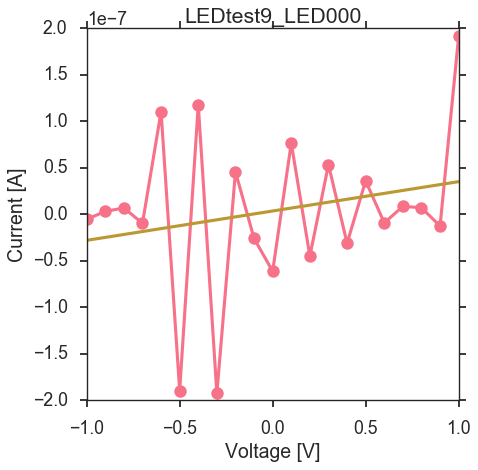

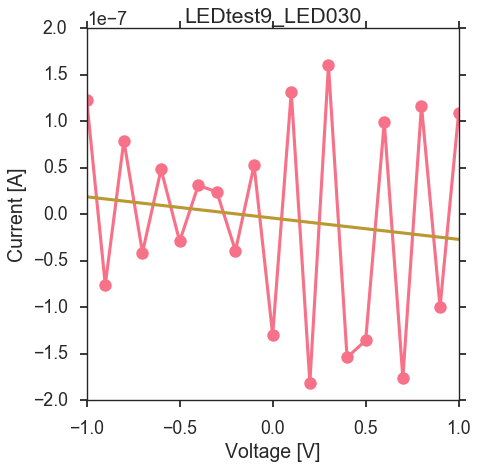

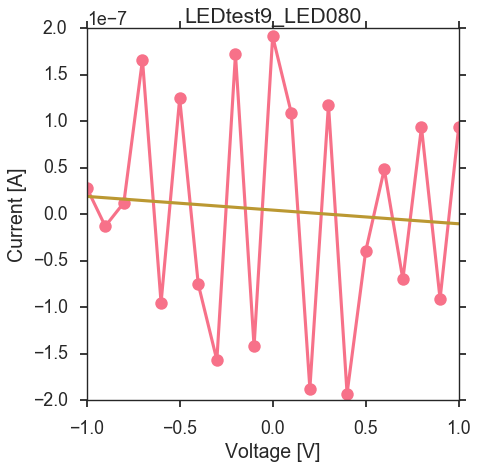

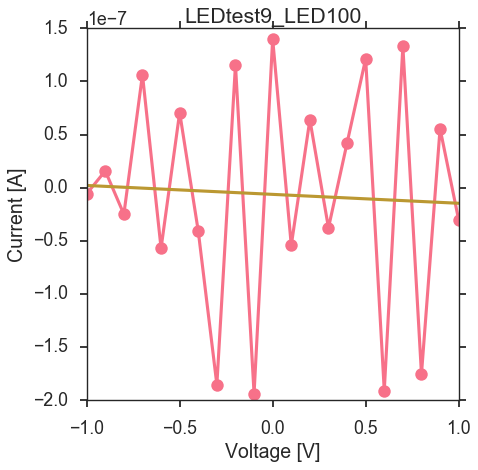

In [21]:
kled.measure_IV_LED('','LEDtest9', -1., 1., 0.1, [0, 30, 80, 100])

In [24]:
PicoLED = gpib.PicowithLED()

KEITHLEY INSTRUMENTS INC.,MODEL 6487,1207197,A06   Jun 20 2006 15:08:40/A02  /C/G

Thorlabs,DC2200,M00406005,1.0.1

6487 confirmed
2200 confirmed


In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import gpib_nori1 as gpib

kLED = gpib.KE2400withLED()

KEITHLEY INSTRUMENTS INC.,MODEL 2400,1386470,C32   Oct  4 2010 14:20:11/A02  /S/K

Thorlabs,DC2200,M00406005,1.0.1

2400 confirmed
2200 confirmed


Hey! "kledtest1_LED000" alrady exists in this directory!!
Enter a new name: test10102
"test10102" is an unique filename!
est. scan time = 1 [s]
The conductivity is 3.51e-08 [S].
Section is 1.36e-08 [A]
"kledtest1_LED050" is an unique filename!
est. scan time = 1 [s]
The conductivity is -2.83e-10 [S].
Section is -1.22e-08 [A]
"kledtest1_LED100" is an unique filename!
est. scan time = 1 [s]
The conductivity is 9.29e-09 [S].
Section is 1.67e-09 [A]


[    Voltage       Current    Registance      Time   Status
 0      -1.0 -5.164340e-08  9.910000e+37  8107.257  21508.0
 1      -0.9  6.292507e-08  9.910000e+37  8107.310  21508.0
 2      -0.8 -3.062448e-08  9.910000e+37  8107.361  21508.0
 3      -0.7  3.396050e-08  9.910000e+37  8107.414  21508.0
 4      -0.6  1.005963e-07  9.910000e+37  8107.470  21508.0
 5      -0.5 -1.654567e-07  9.910000e+37  8107.521  21508.0
 6      -0.4  1.078245e-07  9.910000e+37  8107.574  21508.0
 7      -0.3 -1.831857e-07  9.910000e+37  8107.627  21508.0
 8      -0.2  1.857045e-07  9.910000e+37  8107.682  21508.0
 9      -0.1 -1.176216e-07  9.910000e+37  8107.734  21508.0
 10      0.0 -1.272820e-07  9.910000e+37  8107.795  21508.0
 11      0.1  1.882732e-07  9.910000e+37  8107.849  21508.0
 12      0.2 -1.212650e-07  9.910000e+37  8107.900  21508.0
 13      0.3  1.787914e-07  9.910000e+37  8107.953  21508.0
 14      0.4 -1.150434e-07  9.910000e+37  8108.005  21508.0
 15      0.5  1.610298e-07  9.910000e+37

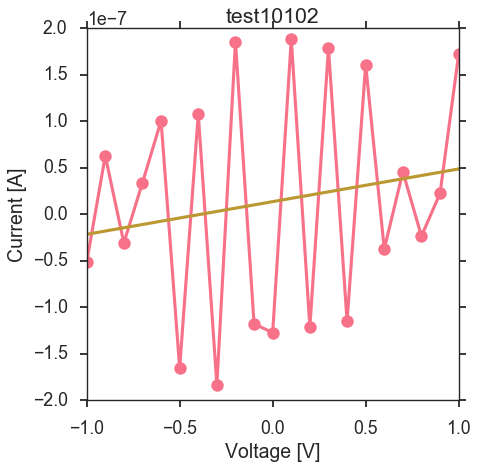

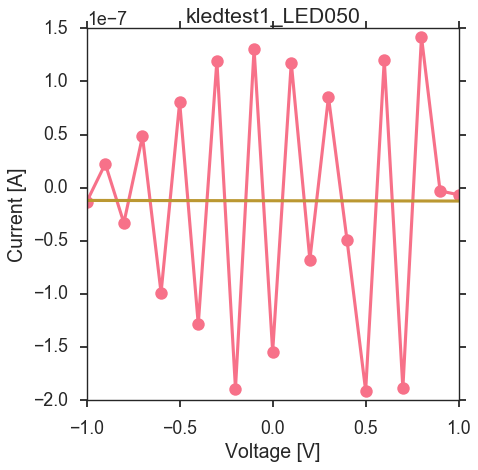

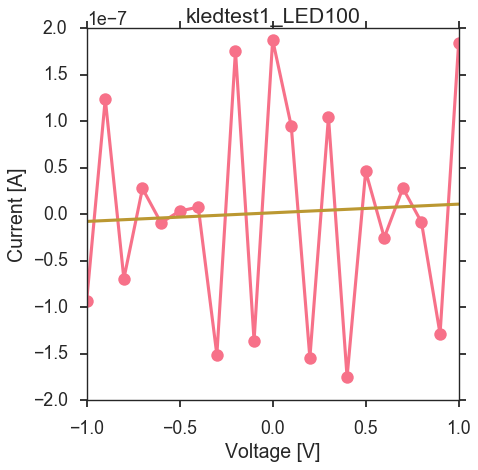

In [5]:
kLED.measure_IV_LED('','kledtest1', -1. ,1., 0.1, [0, 50, 100])